# 1. Data Understanding and problem framing

# -Dataset-1- Dry Bean Dataset
# -Source - UCL ML Repostory
# -Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.
# -Problem type - Supervised Learning – Multiclass Classification - classify dry beans into one of seven registered varieties (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira) based on 16 morphological features
# Practical Relevance - Different bean varieties have different market price and different nutritional values. Automating the process of classifying dry beans variety using the morphological extracted features reduces human error and improves consistency in agricultural production systems.

# -Number of rows: 13611

# -Number of columns: 16

# -Target variable: Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

# -Feature types: Numerical


# 2. Data Preprocessing


--------Checks for missing values in dataset - No missing values in the dataset-------

In [4]:
import pandas as pd

In [5]:
df = pd.read_excel(r'/home/amma/Downloads/Datasets/Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

-------------------------Check for duplicated values--------------------------------------

In [10]:
df.duplicated().sum()


68

In [11]:
len(df)

13611

In [ ]:
If the pecentage is less than 5% we can drop the duplicated rows

In [9]:
duplicated_count = df.duplicated().sum()

print("percentage of duplicated rows:", (duplicated_count / len(df)) * 100)

percentage of duplicated rows: 0.49959591506869444


Checking the duplicates in the target variable

In [14]:
df[df.duplicated()]['Class'].value_counts()

Class
HOROZ    68
Name: count, dtype: int64

Checking if all rows have the duplicate values, or else if only in the features and not in target variable can be a serious issue to consider

In [15]:
df.duplicated(subset=df.columns[:-1]).sum()


68

Remove duplicate values

In [16]:
df=df.drop_duplicates()

In [18]:
df.duplicated().sum()

0

----------------------------------------Check for outliers ---------------------------

Outliers are data points that are unusually far from the majority of observations. It can be detected using IQR, Z-Score and visualization based methods. I used IQR because z score method assumes that the data is normally distributed which is not correct in our case (see the graph below). The outliers can be removed, retained or cap.


/home/amma/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


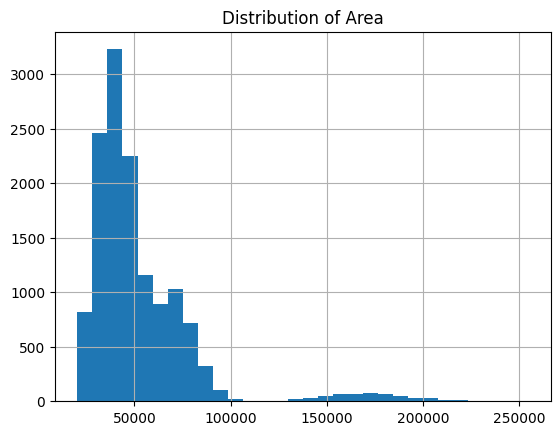

In [21]:
import matplotlib.pyplot as plt

df['Area'].hist(bins=30)
plt.title("Distribution of Area")
plt.show()


In [ ]:
df.skew()    # Skewness is the measure of asymmetry of the distribution of data. Skew between -0.5 and 0.5 are noraml. Here, Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, Extent are highly skewed. We can apply log transformation to these features to make them more normal.the data is strongly skewed for many features. 

Area               2.947136
Perimeter          1.628018
MajorAxisLength    1.365813
MinorAxisLength    2.232013
AspectRation       0.589045
Eccentricity      -1.064932
ConvexArea         2.936102
EquivDiameter      1.947303
Extent            -0.895655
Solidity          -2.546877
roundness         -0.648725
Compactness        0.036309
ShapeFactor1      -0.530427
ShapeFactor2       0.294332
ShapeFactor3       0.242767
ShapeFactor4      -2.760125
Class             -0.319689
dtype: float64

In [20]:
import numpy as np

num_df = df.select_dtypes(include=[np.number])

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((num_df < (Q1 - 1.5 * IQR)) | 
                (num_df > (Q3 + 1.5 * IQR)))

print(outlier_mask.sum())


Area               551
Perimeter          500
MajorAxisLength    379
MinorAxisLength    567
AspectRation       485
Eccentricity       833
ConvexArea         549
EquivDiameter      526
Extent             271
Solidity           774
roundness           98
Compactness        124
ShapeFactor1       533
ShapeFactor2         0
ShapeFactor3       202
ShapeFactor4       760
dtype: int64


The dot outside the boxplot indicate outliers in the feature Area

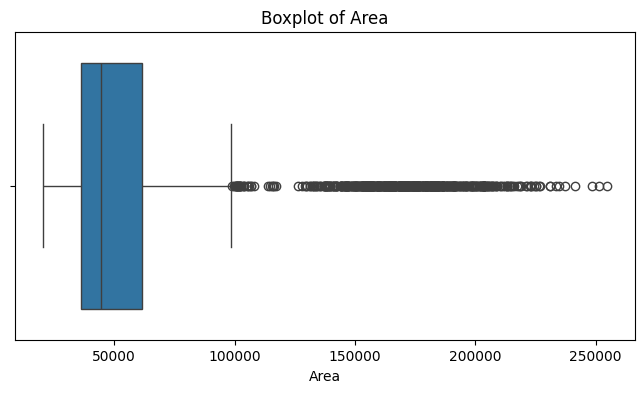

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df['Area'])
plt.title("Boxplot of Area")
plt.show()


Since the features are morphological features, the detected extreme values were retained for class specific characteristics.

Outliers impact on model performance: Outliers can significantly influence distance-based models such as KNN and SVM by distorting feature scaling and distance calculations. However, tree-based models like Random Forest and Gradient Boosting are inherently robust to extreme values since they rely on decision boundaries rather than statistical measures such as mean and variance. In the present study, extreme values were retained as they represent natural morphological variation among bean varieties, and removing them could negatively impact class discrimination ability.

---------------------------Categorical encoding--------------------------

Three types of encoding are there: Label encoding, one-hot encoding (it is suitable for features not target) and target encoding(It replaces the categories in a feature with the mean target value). Since my features are numerical variable, only target variable is categorical variable, label encoding can be used.

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Class'] = le.fit_transform(df['Class'])



In [28]:
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}


-------------------------Feature Scaling -------------

Feature scaling is for adjusting numerical features so they are on a similar scale. Three types are standardization, robust scaling and normalization.   Standardization centres the data around 0 and makes std deviatioin as 1. In normalization it rescales values between 0 and 1. 

Normalization is not good if the data is not normally distributed. Here, the data is not normally distributed. Standardization is affected by outliers. So, robustscalar is used here. It standardize features using median and interquartile range.

In [33]:
x = df.drop('Class', axis = 1)
y= df['Class']

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [38]:
from sklearn.preprocessing import RobustScaler

scalar = RobustScaler()

x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

# Exploratory Data Analysis & Visualization

KDE(kernel density estimation) is a smooth curve representing the probability density of a continuos variable. A KDE curve is a smoothed version of a histogram. The histogram of Area indicates presence of extreme values. It shows scaling is required. 

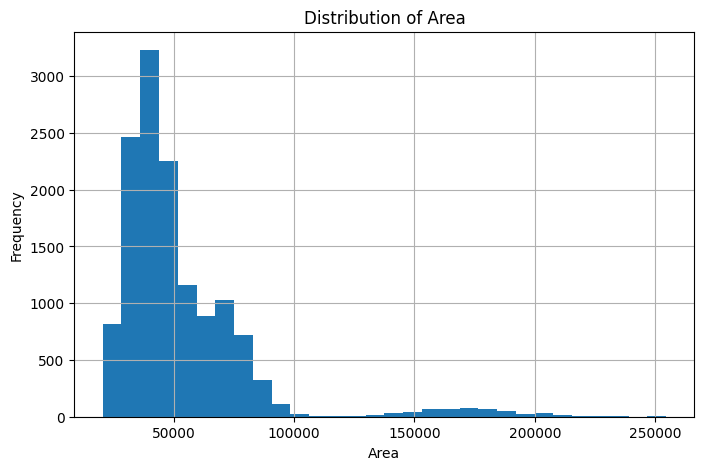

In [47]:

plt.figure(figsize=(8,5))

df['Area'].hist(bins=30)

plt.title("Distribution of Area")
plt.xlabel("Area")
plt.ylabel("Frequency")

plt.show()


The below graph shows the class distribution of each bean types for better understanding of different bean varieties.

/tmp/ipykernel_11098/4155330481.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=df, palette=palette)


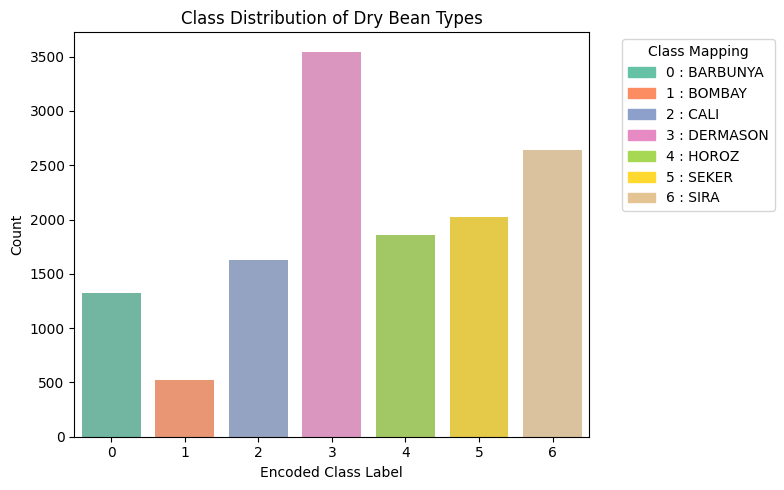

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

label_map = {
    'BARBUNYA': 0,
    'BOMBAY': 1,
    'CALI': 2,
    'DERMASON': 3,
    'HOROZ': 4,
    'SEKER': 5,
    'SIRA': 6
}

plt.figure(figsize=(8,5))

# Create 7 distinct colors
palette = sns.color_palette("Set2", 7)

ax = sns.countplot(x='Class', data=df, palette=palette)

plt.title("Class Distribution of Dry Bean Types")
plt.xlabel("Encoded Class Label")
plt.ylabel("Count")

# Create legend automatically using colors
handles = [
    plt.Rectangle((0,0),1,1, color=palette[i],
                  label=f"{i} : {name}")
    for name, i in label_map.items()
]

plt.legend(handles=handles,
           title="Class Mapping",
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

plt.tight_layout()
plt.show()



Since multiple features describe size and shape characteristics, strong positive correlations were expected. While this may affect linear models, tree-based models remain robust to such correlations.

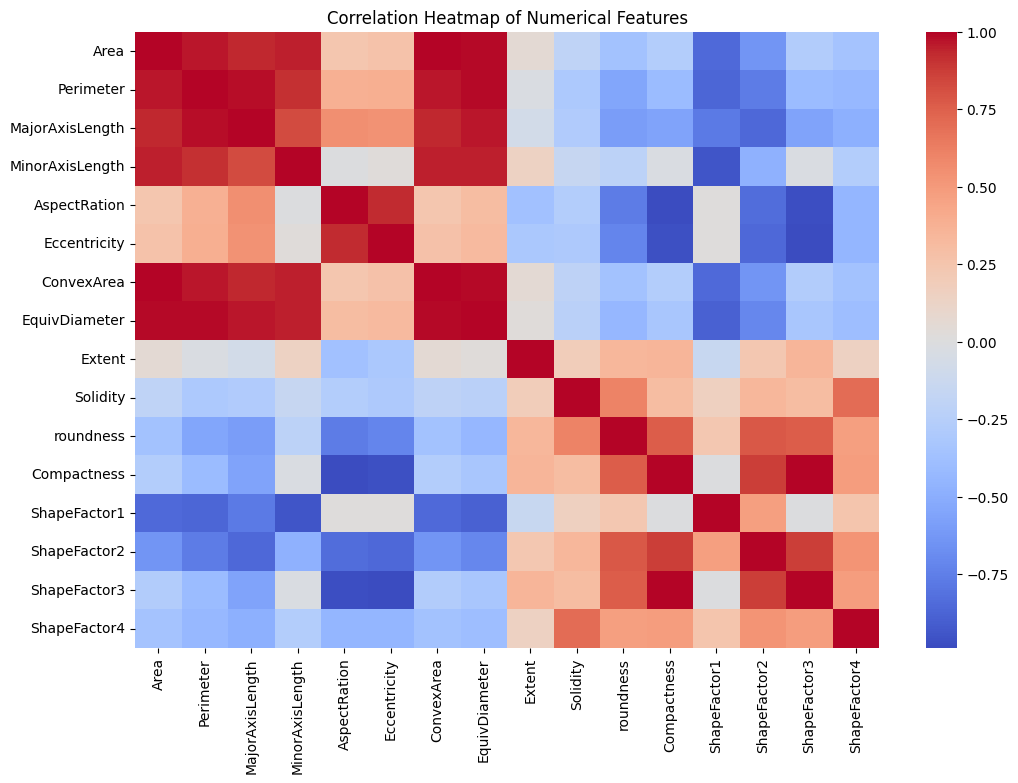

In [53]:
plt.figure(figsize=(12,8))
corr = df.drop('Class', axis=1).corr()

sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Grouped Aggregation (Mean Area per Class) - Certain bean types have larger average size.

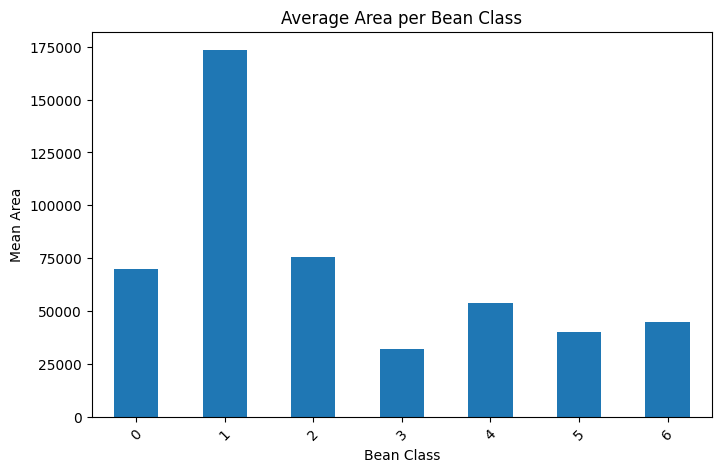

In [55]:
mean_area = df.groupby('Class')['Area'].mean()

plt.figure(figsize=(8,5))
mean_area.plot(kind='bar')
plt.title("Average Area per Bean Class")
plt.xlabel("Bean Class")
plt.ylabel("Mean Area")
plt.xticks(rotation=45)
plt.show()



Class - imbalance visualization - Here DERMASON Dominates.

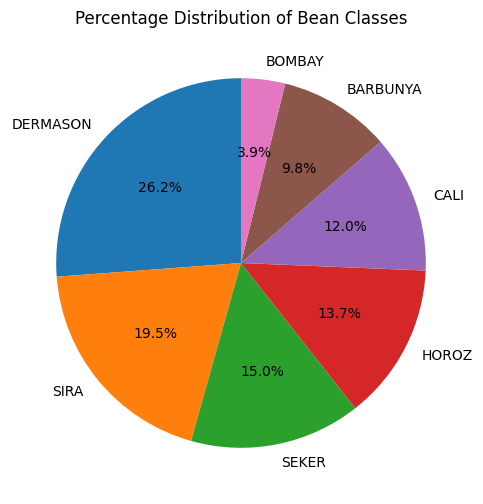

In [ ]:

label_map = {
    'BARBUNYA': 0,
    'BOMBAY': 1,
    'CALI': 2,
    'DERMASON': 3,
    'HOROZ': 4,
    'SEKER': 5,
    'SIRA': 6
}

# Reverse mapping (0 → BARBUNYA)
reverse_map = {v: k for k, v in label_map.items()}

# Replace encoded values with class names
class_percent = df['Class'].map(reverse_map).value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))

class_percent.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Percentage Distribution of Bean Classes")
plt.ylabel("")  # Remove default y-label

plt.show()


# 4. Insights and Observations

1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.
2.) Perimeter (P): Bean circumference is defined as the length of its border.
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5.) Aspect ratio (K): Defines the relationship between L and l.
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12.)Compactness (CO): Measures the roundness of an object: Ed/L
13.)ShapeFactor1 (SF1)
14.)ShapeFactor2 (SF2)
15.)ShapeFactor3 (SF3)
16.)ShapeFactor4 (SF4)
17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

--Most size related features such as Area, perimeter, etc showed strong positive skewness (>1)
--Shape based features such as roundness, shapefactor, etc showed strong negative sknewness(<-2)
--Several features contained a large number of IQR based outliers since they are morphological based features. Also they showed high multicollinearity beacause of the reason.
--Bin Area into size categories (Small / Medium / Large).
--Class distribution shows mild imbalance, with DERMASON and SIRA having higher representation. If it is not handled, the model may bias towards majority classes.
--Larger bean varieties have consistently higher Area  values.
--No data leakage observed (no feature directly derived from Class).
--DUplicate rows were there and are removed
--No missing values detected
--Modeling Readiness
      --Data is clean
      --Morphological features have strong class discrimination.
      --Scaling required
      --Tree-based models expected to perform very well.
      --Feature selection may improve linear model stability.
